# Run Tempo (for more details, see the the tutorial_running_tempo notebook)

In [2]:
# --- SET REQUIRED INPUTS ---
import anndata

adata = anndata.read_h5ad('/users/benauerbach/desktop/tempo/test_data/adata.h5ad)
folder_out = '/users/benauerbach/desktop/test'
gene_acrophase_prior_path = '/users/benauerbach/desktop/tempo/test_data/core_clock_acrophase_prior.csv'
core_clock_gene_path = '/users/benauerbach/desktop/tempo/test_data/core_clock_genes.txt'
reference_gene = 'Gene_0'
min_gene_prop = 1e-5


In [ ]:
# --- RUN ---
import tempo
from tempo import unsupervised_alg

tempo.unsupervised_alg.run(adata = adata,
                          folder_out = folder_out,
                          gene_acrophase_prior_path = gene_acrophase_prior_path,
                          core_clock_gene_path = core_clock_gene_path,
                          reference_gene = reference_gene,
                          min_gene_prop = min_gene_prop)





# All Tempo outputs are written to the user-specified path for folder_out
Folder out is organized as follows:<br>
>
- config.txt: text file with a configuration dictionary containing the parameter values used to run Tempo<br>
- evidence<br>
    - null_log_evidence_vec.txt: text file containing the random log10 Bayesian evidence of core clock expression<br>
    - step_{z}_clock_evidence.txt: text file containing the log10 Bayesian evidence of core clock expression based on Tempos approximate posterior distribution at iteration p of the algorithm<br>
- mean_disp_param<br>
    - log_mean_log_disp_poly_coef_0.txt: text file containing the polynomial coefficients (zeta) parameterizing the global transcript log proportion - log dispersion relationship used by the algorithm when computing NB likelihoods<br>
- tempo_results<br>
    - {p}: raw result folder for iteration p of the algorithm<br>
        - cell_phase_estimation: folder storing results for step 1 of the algorithm (cell phase estimation from current cycling genes)<br>
            - cell_posterior_init.tsv: approximate cell phase posterior at the start of iteration p and before optimizing the gene parameters <br>
            - cell_posterior.tsv: approximate cell phase posterior after optimizing the gene parameters for iteration p<br>
            - cell_prior.tsv: cell prior distributions used<br>
            - gene_prior_and_posterior_init.tsv: approximate gene parameter posteriors and gene priors at the start of iteration p and before optimizing the gene parameters<br>
            - gene_prior_and_posterior.tsv: approximate gene parameter posteriors and gene priors after optimizing the gene parameters for iteration p<br>
            - loss.txt: objective function values (ELBO) at each learning epoch<br>
            - kl_loss.txt: KL divergence contribution to the ELBO at each learning epoch<br>
            - ll_loss.txt: E[LL] contribution to the ELBO at each learning epoch<br>
            - optimal_gene_params_prepped.pt: optimal PyTorch parameters describing approximate posterior shape after iteration p<br>
        - de_novo_cycler_id: folder storing results for step 2 of the algorithm (de novo cycler identification)<br>
            - gene_prior_and_posterior.tsv: approximate gene parameter posteriors and gene priors after optimizing the gene parameters for iteration p<br>
            - loss.txt: objective function values (ELBO) at each learning epoch<br>
            - kl_loss.txt: KL divergence contribution to the ELBO at each learning epoch<br>
            - ll_loss.txt: E[LL] contribution to the ELBO at each learning epoch<br>
            - optimal_gene_params_prepped.pt: optimal PyTorch parameters describing approximate posterior shape after iteration p<br>
    - opt: final, optimal results of the algorithm<br>
        - cell_posterior.tsv: optimal approximate cell posterior distribution<br>
        - cycler_gene_prior_and_posterior.tsv: optimal approximate gene parameter posterior distributions and priors of the cycling genes (includes the user-specified core clock genes and any de novo cyclers identified by the algorithm)<br>
        - flat_gene_prior_and_posterior.tsv: optimal approximate gene parameter posterior distributions and priors of the non-cycling, flat genes assuming they are cyclers (i.e. conditioning on their amplitude being non-zero)<br>

        

# Cell outputs

In [3]:
# --- LOAD FINAL CELL PHASE POSTERIOR ---

import pandas as pd

cell_posterior_path = '%s/tempo_results/opt/cell_posterior.tsv' % folder_out
cell_posterior_df = pd.read_table(cell_posterior_path,sep='\t',index_col='barcode')
cell_posterior_df


# Note: The barcode column denotes the cell barcode.
# Bin_{p} columns denote the posterior density for bin p
# (as the cell phase posterior is estimated using grid sampling)



,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_14,bin_15,bin_16,bin_17,bin_18,bin_19,bin_20,bin_21,bin_22,bin_23
barcode,,,,,,,,,,,,,,,,,,,,,
4637,0.000282,0.002246,0.013197,0.047963,1.048624e-01,1.507792e-01,1.669196e-01,1.633925e-01,1.460980e-01,1.115782e-01,...,0.000089,0.000012,0.000002,6.820685e-07,4.152016e-07,5.081127e-07,1.215559e-06,5.188080e-06,3.410501e-05,0.000282
4754,0.228152,0.154931,0.056403,0.011818,1.729994e-03,2.305135e-04,3.504803e-05,6.988003e-06,1.963564e-06,8.044284e-07,...,0.000005,0.000019,0.000083,3.885763e-04,1.828128e-03,8.088187e-03,3.090997e-02,9.156289e-02,1.856513e-01,0.228151
1433,0.001207,0.004219,0.013355,0.032159,5.586905e-02,7.559363e-02,9.182139e-02,1.121364e-01,1.393684e-01,1.609538e-01,...,0.004058,0.001120,0.000355,1.456192e-04,8.336266e-05,6.982592e-05,8.650741e-05,1.550543e-04,3.831903e-04,0.001207
1889,0.001400,0.007207,0.029815,0.083585,1.491519e-01,1.811905e-01,1.725688e-01,1.442687e-01,1.082282e-01,6.902528e-02,...,0.000190,0.000048,0.000016,8.035839e-06,6.461298e-06,8.626936e-06,1.863725e-05,6.071954e-05,2.683789e-04,0.001400
4799,0.000008,0.000091,0.000842,0.005093,1.875513e-02,4.421558e-02,7.902917e-02,1.282116e-01,1.933516e-01,2.370987e-01,...,0.000144,0.000010,0.000001,1.597924e-07,4.969806e-08,3.330223e-08,4.918122e-08,1.523115e-07,8.901340e-07,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,0.004078,0.008530,0.018039,0.035797,6.304071e-02,9.627215e-02,1.278616e-01,1.486599e-01,1.502226e-01,1.293884e-01,...,0.006816,0.003334,0.001805,1.134566e-03,8.573247e-04,7.942608e-04,9.073100e-04,1.267776e-03,2.119230e-03,0.004078
133,0.081344,0.210771,0.292195,0.200672,7.278806e-02,1.995702e-02,6.457609e-03,2.856357e-03,1.623629e-03,1.113804e-03,...,0.000400,0.000200,0.000112,8.584181e-05,1.043956e-04,2.183403e-04,7.598922e-04,3.719692e-03,1.951189e-02,0.081344
1376,0.000790,0.000166,0.000024,0.000003,3.845617e-07,1.016314e-07,6.300218e-08,9.549224e-08,3.303635e-07,2.164147e-06,...,0.089733,0.211281,0.268980,2.069717e-01,1.136722e-01,5.194209e-02,2.154597e-02,8.240190e-03,2.805476e-03,0.000790


In [4]:
# --- INITIALIZE TEMPO'S CELL POSTERIOR OBJECT USING THE CELL POSTERIOR DATAFRAME ---

from tempo import cell_posterior
import torch
import numpy as np

# get cell posterior distribution object
cell_posterior_obj = cell_posterior.ThetaPosteriorDist(torch.Tensor(np.array(cell_posterior_df)))


In [5]:
# --- GET THE MAP CELL PHASES FOR EACH CELL ---
cell_posterior_obj.map_phase




tensor([1.5708, 0.0000, 2.3562,  ..., 4.1888, 5.4978, 0.2618])

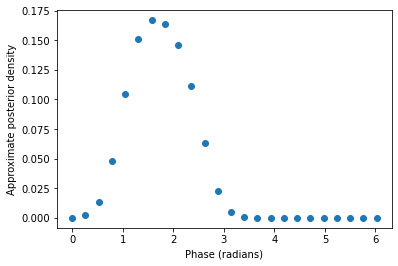

In [6]:
# --- VISUALIZING CELL POSTERIOR DENSITIES ---


# ** obtain posterior density for the cell of interest **

# cell index of interest
cell_index = 0

# get the grid of phases
phase_grid = cell_posterior_obj.phase_grid.numpy()

# get the approximate posterior density for the cell of interest
cell_phase_density = cell_posterior_obj.theta_posterior_likelihood[cell_index,:].numpy()
# note: cell_posterior_obj.theta_posterior_likelihood returns a [num_cells x num_grid points] PyTorch tensor containing the posterior densities for each cell

# ** visualize **
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


plt.clf()
plt.scatter(phase_grid, cell_phase_density)
plt.xlabel("Phase (radians)")
plt.ylabel("Approximate posterior density")
plt.show()




In [10]:
# --- OBTAIN CELL CREDIBLE INTERVALS ---

# ** set confidence level **
confidence = 0.95

# ** get credible intervals **
cell_confidence_intervals = cell_posterior_obj.compute_confidence_interval(confidence=0.95) # [num cells x num grid points] boolean; if a value is true, indicates the grid point is in the credible interval for a given cell
cell_confidence_interval_sizes = np.sum(cell_confidence_intervals,axis=1) # turning the boolean matrix into a binary matrix and summing over the columns to get the size of the credible intervals (reported in hours, [0, 24])
cell_confidence_interval_sizes



array([ 8.,  7., 10., ...,  7., 22., 20.])

# Gene outputs

In [11]:
# --- LOAD THE FINAL GENE PARAMETERS FOR THE CYCLING GENES ---

cycling_gene_dist_path = '%s/tempo_results/opt/cycler_gene_prior_and_posterior.tsv' % folder_out
gene_dist_df = pd.read_table(cycling_gene_dist_path,sep='\t',index_col='gene')
gene_dist_df





,mu_loc,mu_scale,A_alpha,A_beta,phi_euclid_cos,phi_euclid_sin,phi_scale,A_loc,phi_loc,Q_prob_alpha,...,Q_prob_loc,prior_mu_loc,prior_mu_scale,prior_A_alpha,prior_A_beta,prior_phi_euclid_cos,prior_phi_euclid_sin,prior_phi_scale,prior_Q_prob_alpha,prior_Q_prob_beta
gene,,,,,,,,,,,,,,,,,,,,,
Gene_0,-12.248411,0.076941,6.635808,10.845730,1.000000,0.000000,22868.781000,1.311055,0.000000,96.274640,...,0.911040,-11.565885,0.5,1.0,1.0,1.000000,0.000000,10000.000000,90.0,10.0
Gene_1,-13.011176,0.104003,1.823625,31.012566,0.997663,-0.068329,37.504517,0.191818,6.214804,92.033130,...,0.902807,-12.980318,0.5,1.0,1.0,0.999837,0.018051,22.127155,90.0,10.0
Gene_10,-9.605945,0.098899,9.461138,7.930839,-0.267120,0.963663,297.404080,1.878890,1.841200,237.979750,...,0.983271,-8.941683,0.5,1.0,1.0,-0.876600,0.481220,22.127155,90.0,10.0
Gene_11,-11.332096,0.087266,1.170234,45.650753,-0.690085,0.723728,47.825775,0.086325,2.332403,99.025740,...,0.912446,-11.167474,0.5,1.0,1.0,-0.627855,0.778330,22.127155,90.0,10.0
Gene_12,-9.804079,0.102669,1.156149,43.736626,-0.830895,-0.556429,133.604700,0.088950,3.731674,65.487540,...,0.846187,-9.817409,0.5,1.0,1.0,-0.813211,-0.581968,22.127155,90.0,10.0
Gene_13,-9.778897,0.079009,6.211573,15.268031,-0.878642,0.477482,238.071910,0.998809,2.643806,123.604880,...,0.940677,-9.670876,0.5,1.0,1.0,-0.993518,-0.113676,22.127155,90.0,10.0
Gene_14,-10.068223,0.120561,1.500391,40.532227,-0.817046,-0.576572,100.148506,0.123289,3.756120,92.324420,...,0.904757,-10.057746,0.5,1.0,1.0,-0.749216,-0.662326,22.127155,90.0,10.0
Gene_15,-9.790152,0.103537,5.281938,17.633896,0.391466,-0.920193,247.717990,0.796094,5.114613,206.583900,...,0.979041,-9.557291,0.5,1.0,1.0,0.919978,-0.391969,22.127155,90.0,10.0
Gene_16,-12.082059,0.095031,7.242515,9.492535,0.999811,-0.019457,204.074340,1.494753,6.263728,84.112175,...,0.884944,-11.571449,0.5,1.0,1.0,0.943565,0.331188,22.127155,90.0,10.0


In [12]:
# --- GET THE LIST OF CYCLING GENES ---


gene_dist_df.index



Index(['Gene_0', 'Gene_1', 'Gene_10', 'Gene_11', 'Gene_12', 'Gene_13',
       'Gene_14', 'Gene_15', 'Gene_16', 'Gene_17', 'Gene_18', 'Gene_19',
       'Gene_2', 'Gene_20', 'Gene_21', 'Gene_22', 'Gene_23', 'Gene_3',
       'Gene_4', 'Gene_5', 'Gene_6', 'Gene_7', 'Gene_8', 'Gene_9'],
      dtype='object', name='gene')